# Tumor contour with Xenium data

## 1. Loading library

In [8]:
# import library
import skny as sk
import stlearn as st
import matplotlib.pyplot as plt

## 2. Reading Xenium data

Download the Feature-cell Matrix (HDF5) and the Cell summary file (CSV) from the Xenium breast cancer tumor microenvironment Dataset.

You need these 2 files in a new folder tutorial_data in the same path as your notebook.

* Xenium_FFPE_Human_Breast_Cancer_Rep1_cell_feature_matrix.h5

* Xenium_FFPE_Human_Breast_Cancer_Rep1_cells.csv

The following lines create the folder structure which can be used to load the data.

In [ ]:
# !mkdir tutorial_data
# !mkdir tutorial_data/xenium_data
# !wget -P tutorial_data/xenium_data/ https://cf.10xgenomics.com/samples/xenium/preview/Xenium_FFPE_Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_cell_feature_matrix.h5
# !wget -P tutorial_data/xenium_data/ https://cf.10xgenomics.com/samples/xenium/preview/Xenium_FFPE_Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_cells.csv.gz

In [2]:
# Load Xenium data using stlearn
adata = st.ReadXenium(
    feature_cell_matrix_file="tutorial_data/xenium_data/Xenium_FFPE_Human_Breast_Cancer_Rep1_cell_feature_matrix.h5",
    cell_summary_file="tutorial_data/xenium_data/Xenium_FFPE_Human_Breast_Cancer_Rep1_cells.csv.gz",
    library_id="example data",
    image_path=None,
    scale=1,
    spot_diameter_fullres=10
)

## 3. Preprocessing

In [3]:
# Gridding at 10μm interval using stlearn
N_COL = int((adata.obs.imagecol.max() - adata.obs.imagecol.min()) / 10)
N_ROW = int((adata.obs.imagerow.max() - adata.obs.imagerow.min()) / 10)
grid = st.tl.cci.grid(adata, n_row=N_ROW, n_col=N_COL, n_cpus=30, verbose=False)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
# contour tumor and calculate distance
grid = sk.pp.calculate_distance(
    grid, pos_marker_ls=['CDH1'], 
)

In [5]:
# plot
sk.pl.preprocessed_images(grid, figsize=(860, None))

Scroll wheel can be used to zoom (double-click to reset).

Visually accurate contour and distance annotations.

## 4. Distance-based gene clustering

In [7]:
# all region
sk.pl.clustering_heatmap(grid, std=True)

You can zoom in by dragging (double-click to reset).

Genes such as <i>KRT15</i> and <i>ACTA2</i> were enriched in the (-30, 0] and (0, +30] intervals. 
The results suggest that these gene expressions are enriched in the peri-tumor region.

## 5. Validation of gene expression on space

In [13]:
# plot contour and annotation of distance
sk.pl.equidistant_curves(grid, figsize=(500, None))

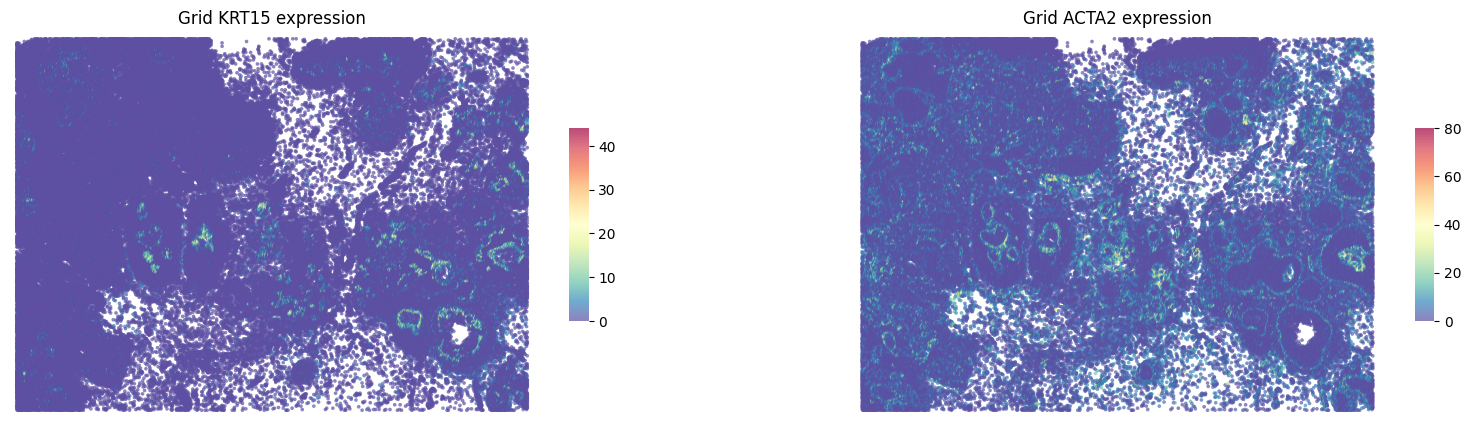

In [36]:
# Validation of KRT5 and ACTA2 expression on space using stlearn
fig, axes = plt.subplots(ncols=2, figsize=(20,5))
st.pl.gene_plot(grid, gene_symbols='KRT15', ax=axes[0],show_color_bar=True)
st.pl.gene_plot(grid, gene_symbols='ACTA2', ax=axes[1], show_color_bar=True)
axes[0].set_title(f'Grid KRT15 expression')
axes[1].set_title(f'Grid ACTA2 expression')
plt.show()

<i>KRT15</i> and <i>ACTA2</i> were localized at the peri-tumor regions. 
This suggests that the morphological features of myoepithelium surrounding the ductal epithelium were captured in this breast cancer specimen.

These results indicate that the quality of the contours is high.

## 6. Expression distribution at ROI

The above spatial expression of <i>KRT15</i> suggests that there may be some local variation.

Five ROIs were defined based on previous reports and pathological findings, and the spatial expression of <i>KRT15</i> was compared.

In [74]:
# Validation of KRT5 expression on space using stlearn
fig, axes = plt.subplots(ncols=5, figsize=(15, 1.5))
st.pl.gene_plot(grid, gene_symbols='KRT15', ax=axes[0], zoom_coord=[2400, 3200, 2500, 3300], show_color_bar=False, vmax=40)
st.pl.gene_plot(grid, gene_symbols='KRT15', ax=axes[1], zoom_coord=[3800, 4600, 250, 1050], show_color_bar=False, vmax=40)
st.pl.gene_plot(grid, gene_symbols='KRT15', ax=axes[2], zoom_coord=[3800, 4600, 4500, 5300], show_color_bar=False, vmax=40)
st.pl.gene_plot(grid, gene_symbols='KRT15', ax=axes[3], zoom_coord=[6200, 7000, 2000, 2800], show_color_bar=False, vmax=40)
st.pl.gene_plot(grid, gene_symbols='KRT15', ax=axes[4], zoom_coord=[3200, 4000, 1200, 2000], show_color_bar=False, vmax=40)

axes[0].set_title(f'DCIS and ADH')
axes[1].set_title(f'DCIS (ERBB2+ ESR+)')
axes[2].set_title(f'DCIS (ERBB2+ ESR+ PGR+)')
axes[3].set_title(f'DCIS (ERBB2+)')
axes[4].set_title(f'IDC')

plt.show()

The expression of <i>KRT15</i> in the ROI is visibly different.

SKNY can evaluate the distribution of gene expression in each ROI in terms of distance from the tumor.

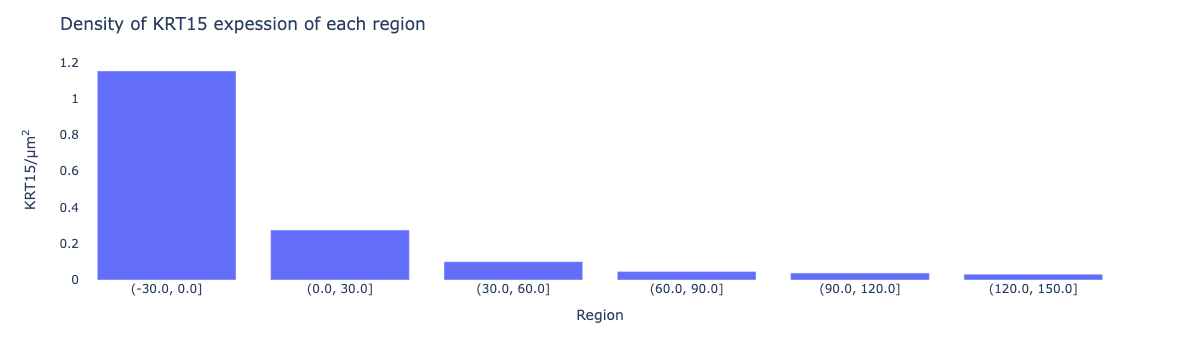

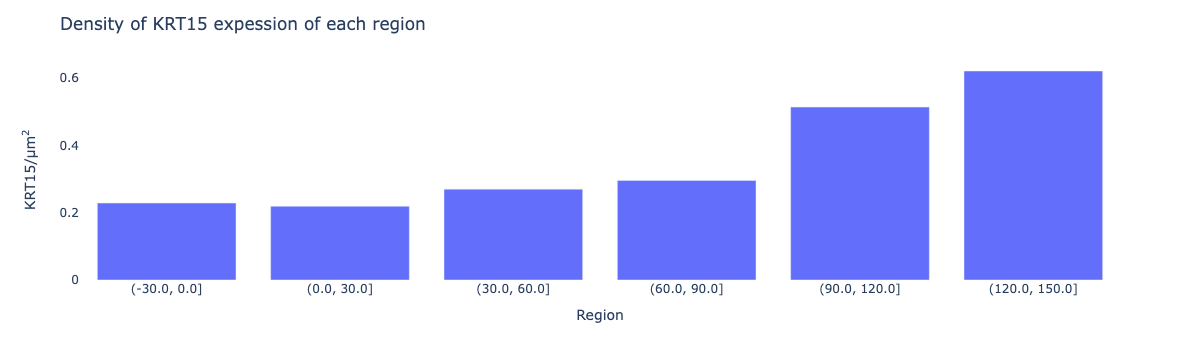

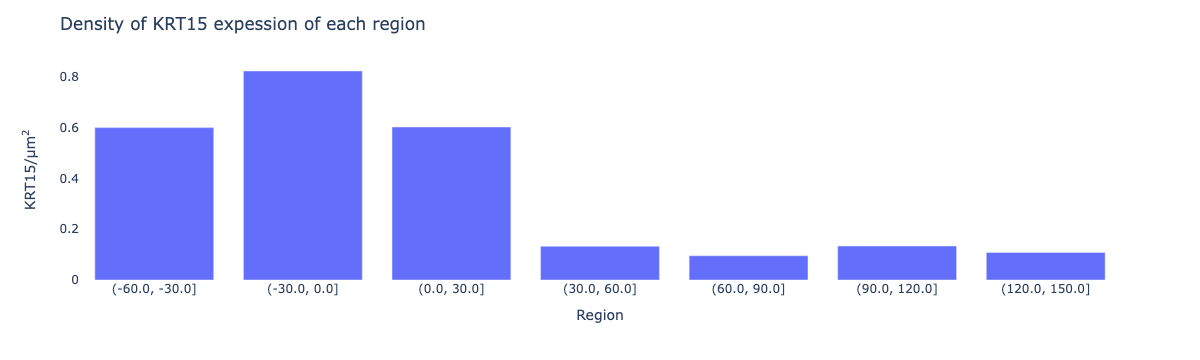

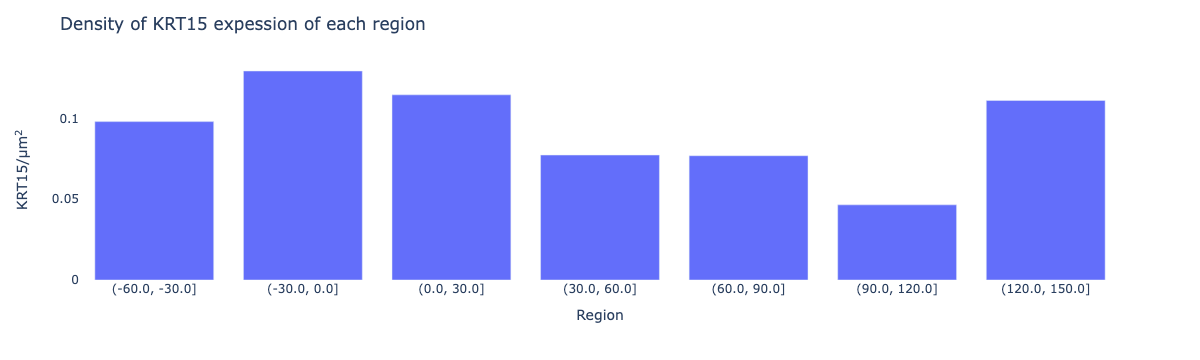

In [77]:
sk.pl.distance_gene_plot(grid, "KRT15", x_range=[240, 320], y_range=[250, 330]) # DCIS and ADH
sk.pl.distance_gene_plot(grid, "KRT15", x_range=[380, 460], y_range=[25, 105])  # DCIS (ERBB2+ ESR+)
sk.pl.distance_gene_plot(grid, "KRT15", x_range=[380, 460], y_range=[450, 530]) # DCIS (ERBB2+ ESR+ PGR+)
sk.pl.distance_gene_plot(grid, "KRT15", x_range=[620, 700], y_range=[200, 280]) # DCIS (ERBB2+)
sk.pl.distance_gene_plot(grid, "KRT15", x_range=[320, 400], y_range=[120, 200]) # IDC